## Correlograms

/home/andy/anaconda3/lib/python3.5/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


heli0 format: (441000, 2)
boat0 format: (480000,)
heli1 format: (480000, 2)
boat1 format: (441000, 2)
heli2 format: (441000, 2)
boat2 format: (441000, 2)
heli3 format: (441000,)
boat3 format: (441000, 2)
heli4 format: (441000, 2)
boat4 format: (480000, 2)
heli5 format: (480000, 2)
boat5 format: (441000, 2)
heli6 format: (441000, 2)
boat6 format: (480000,)
heli7 format: (480000, 2)
boat7 format: (480000, 2)
heli8 format: (480000, 2)
boat8 format: (441000,)
heli9 format: (480000, 2)
boat9 format: (441000, 2)


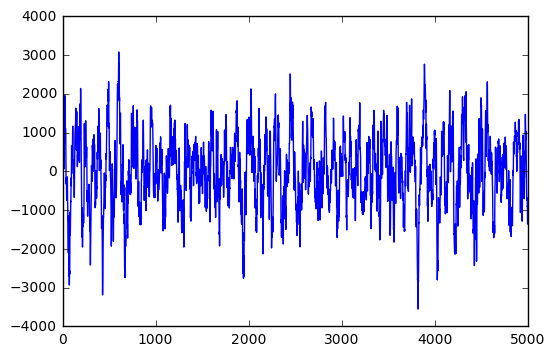

In [20]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

helicopters = []
boats = []

count_samples = 5000

# Import raw data
for i in range(10):
    raw_data = read("heli" + str(i) + "_short.wav")
    print("heli" + str(i) + " format: " + str(raw_data[1].shape))
    if len(raw_data[1].shape) == 2:
        helicopters.append(np.array(raw_data[1][:count_samples, 0], dtype=float)) # Stereo; extract one channel
    else:
        helicopters.append(np.array(raw_data[1][:count_samples], dtype=float))
    
    raw_data = read("boat" + str(i) + "_short.wav")
    print("boat" + str(i) + " format: " + str(raw_data[1].shape))
    if len(raw_data[1].shape) == 2:
        boats.append(np.array(raw_data[1][:count_samples, 0], dtype=float)) # Stereo; extract one channel
    else:
        boats.append(np.array(raw_data[1][:count_samples], dtype=float))
    
plt.plot(helicopters[0])
plt.show()

### Helicopters

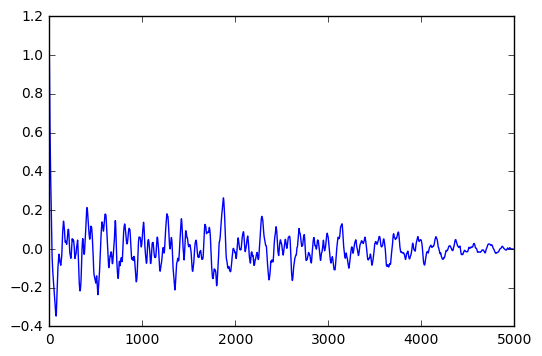

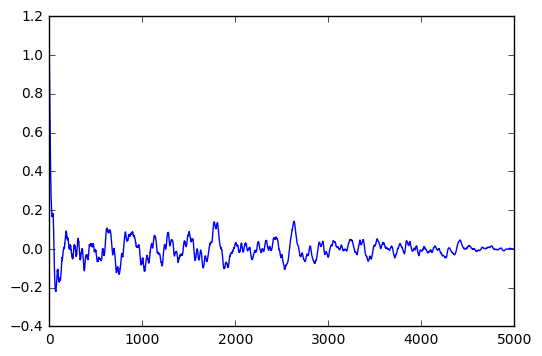

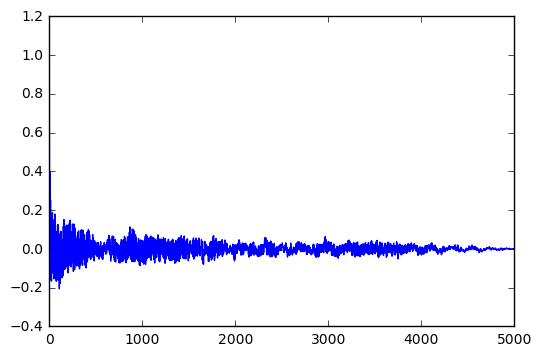

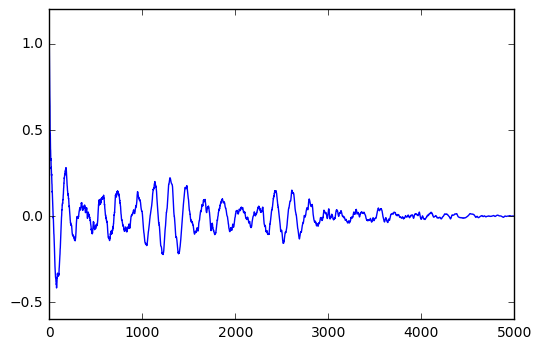

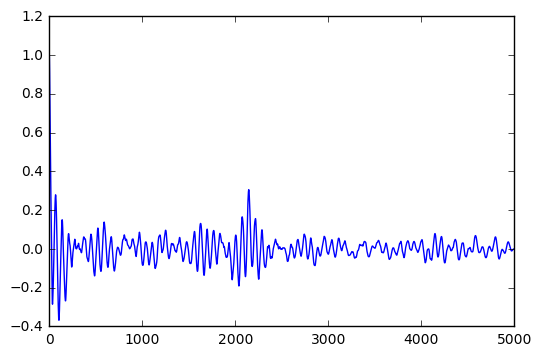

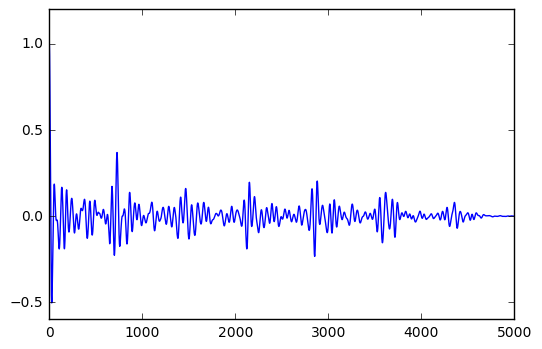

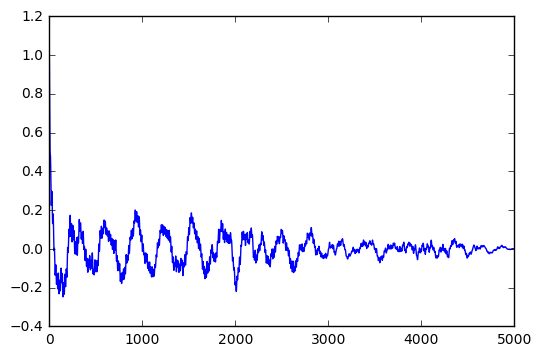

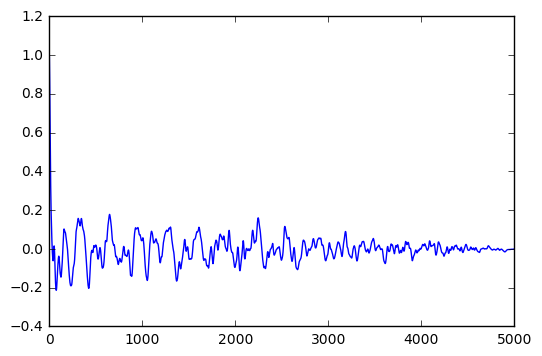

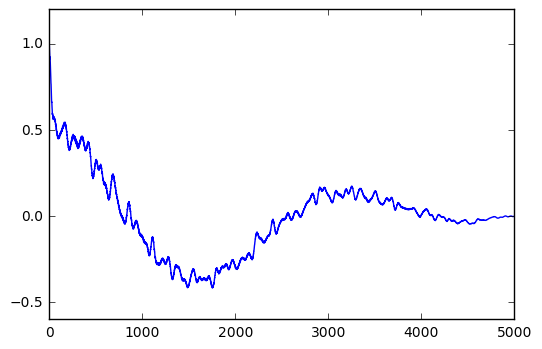

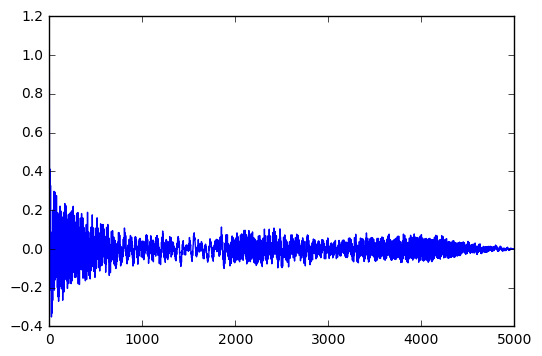

In [22]:
import statsmodels.api as sm

autocorr = []

for i in range(10):
    data = helicopters[i]
    autocorr.append(sm.tsa.acf(data, nlags=5000))
    #pa = sm.tsa.pacf(data, 100)

    #plt.subplot(2, 1, 1)
    plt.plot(autocorr[i])
    #plt.subplot(2, 1, 2)
    #plt.plot(pa)
    plt.show()

### Boats

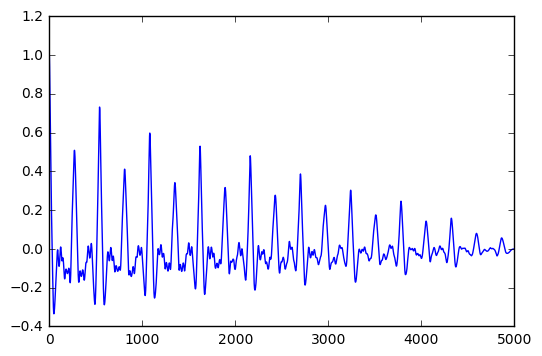

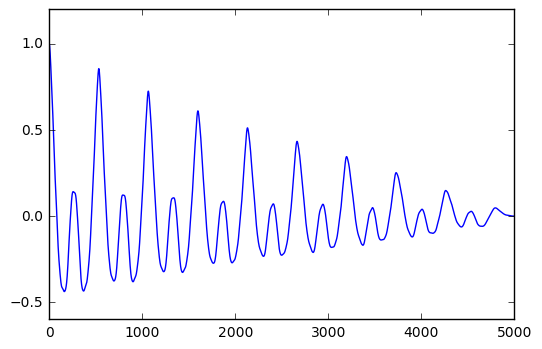

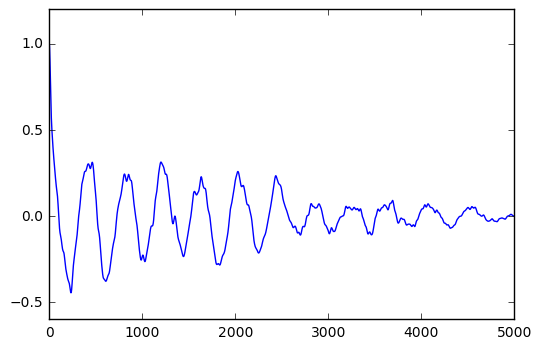

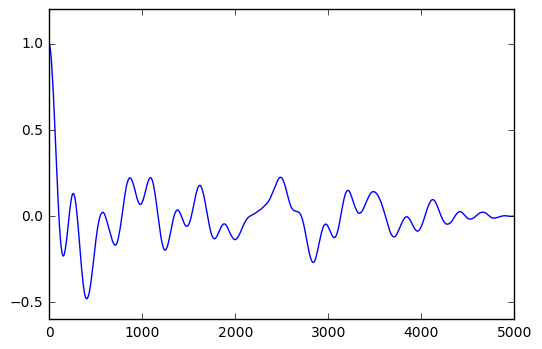

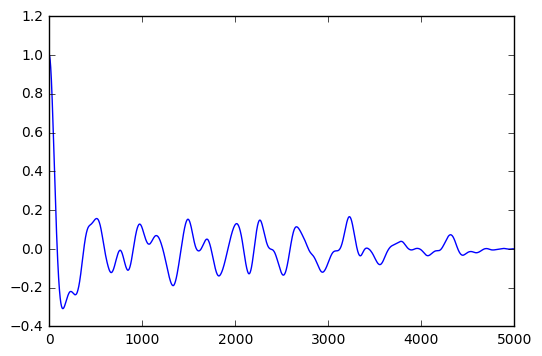

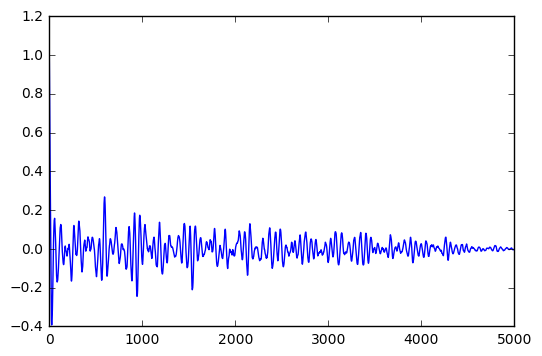

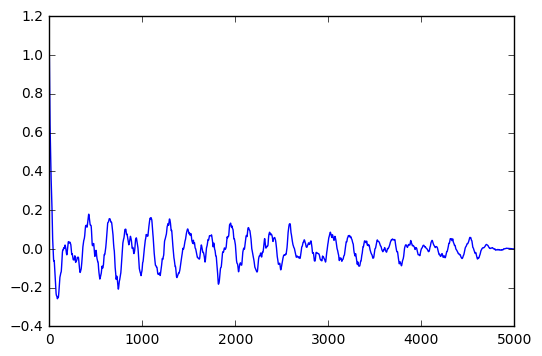

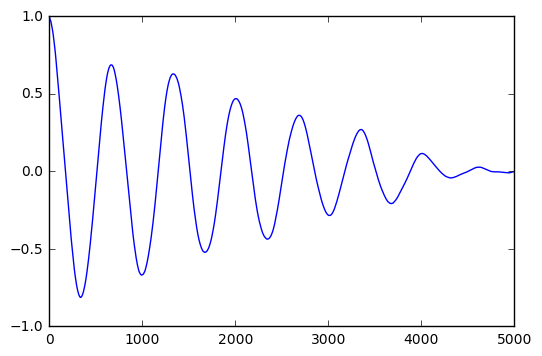

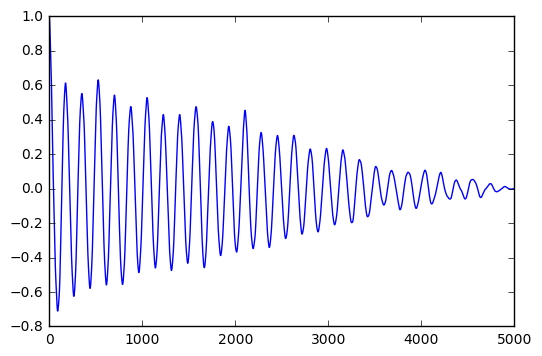

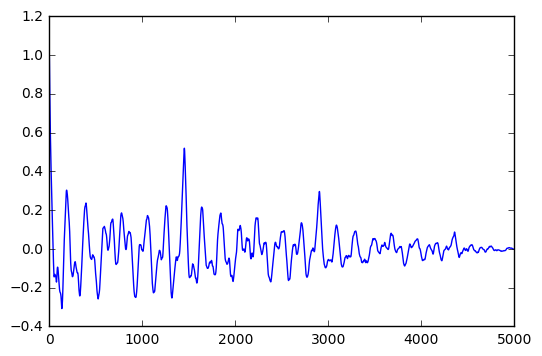

In [23]:
autocorr = []

for i in range(10):
    data = boats[i]
    autocorr.append(sm.tsa.acf(data, nlags=5000))
    #pa = sm.tsa.pacf(data, 100)

    #plt.subplot(2, 1, 1)
    plt.plot(autocorr[i])
    #plt.subplot(2, 1, 2)
    #plt.plot(pa)
    plt.show()